In [41]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 



In [42]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS= 3
EPOCHS = 50


In [43]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)




Found 2152 files belonging to 3 classes.


In [44]:
class_name= dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [45]:
len(dataset)

68

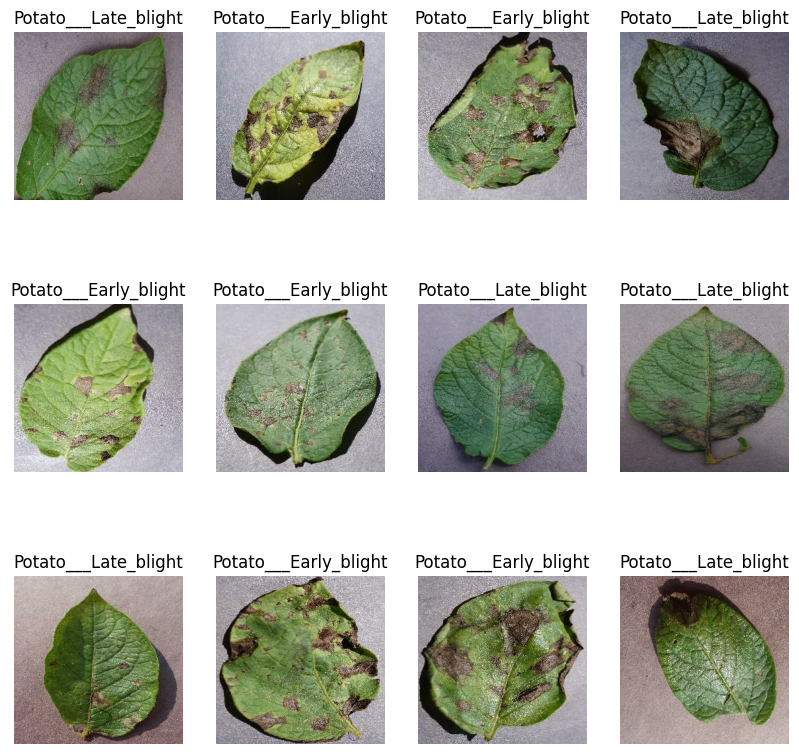

In [46]:
plt.figure(figsize=(10, 10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[lable_batch[i]])
        plt.axis("off")
    

In [47]:
len(dataset)

68

In [48]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [49]:
train_ds = dataset.take(54)
len(train_ds)   

54

In [50]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [51]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [52]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [53]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [54]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split= 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed= 12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [55]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [56]:
len(train_ds)

54

In [57]:
len(val_ds)

6

In [58]:
len(test_ds)

8

In [59]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [62]:
# resize_and_rescale = tf.keras.Sequential([
#     layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#     layers.experimental.preprocessing.Resizing(1.0/255)
# ])

In [61]:
import tensorflow as tf
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])


In [65]:
# tf.keras.Sequential([
#     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#     layers.experimental.preprocessing.RandomRotation(0.2)
# ])

In [67]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])